In [1]:
# importing csv module
import csv
  
# csv file name
filename = "TestData.csv"
  
# initializing the titles and rows list
fields = []
rows = []
  
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
      
    # extracting field names through first row
    fields = next(csvreader)
  
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

In [2]:
#Extracting CSV Headers
NewFields = [i.split('\t') for i in fields][0]
NewFields

['Indel',
 'Chr-Pos',
 'MultiSampleCount',
 'MultiAlleleCount',
 'NearbyIndelCount25bp',
 'RecurrentIndel']

In [3]:
#Creating Rows for pandas DataFrame
NewRows = []
for row in rows:
    for i in row:
        NewRows.append(i.split('\t'))

In [4]:
#Load CSV data in as DataFrame 
import pandas as pd
df = pd.DataFrame(NewRows,columns = NewFields)
df

,Indel,Chr-Pos,MultiSampleCount,MultiAlleleCount,NearbyIndelCount25bp,RecurrentIndel
0,1-100000989-A-ATC,1-100000989,11,1,1,TRUE
1,1-100001151-GT-G,1-100001151,1,1,2,TRUE
2,1-100001168-TG-T,1-100001168,1,1,2,TRUE
3,1-100001497-TA-T,1-100001497,1,1,1,FALSE
4,1-100001671-C-CTT,1-100001671,5,4,1,TRUE
...,...,...,...,...,...,...
15022039,Y-9992125-AT-A,Y-9992125,3,1,1,TRUE
15022040,Y-9992151-TA-T,Y-9992151,6,1,2,TRUE
15022041,Y-9992174-AC-A,Y-9992174,7,1,2,TRUE
15022042,Y-9994833-TAATG-T,Y-9994833,2,1,1,TRUE


In [5]:
Chrom_Dict = {}
for i in range(0,len(df['Chr-Pos'].tolist())):
    Chromosome,Pos = df['Chr-Pos'][i].split('-')
    if Chromosome not in Chrom_Dict:
        Chrom_Dict[Chromosome] = [int(Pos)]
    else:
        Chrom_Dict[Chromosome].append(int(Pos))

In [6]:
for key, value in Chrom_Dict.items():
    vals = sorted(value)
    Chrom_Dict[key] = vals

In [7]:
ChromPosDifference = {}
import numpy as np
for key,value in Chrom_Dict.items():
    val =  abs(np.diff(value))
    ChromPosDifference[key] = val.tolist()

In [8]:
CounterList = []
for key, value in ChromPosDifference.items():
    counter_dict = {}
    for i in value:
        if i in counter_dict:
            counter_dict[i] += 1
        else:
            counter_dict[i] = 1
    CounterList.append(counter_dict)

In [9]:
Chromosomes = list(Chrom_Dict.keys())
PositionCounter = dict(zip(Chromosomes, CounterList))

In [10]:
for key, value in PositionCounter.items():
    newval = dict(sorted(PositionCounter[key].items(), key=lambda item: item[0]))
    PositionCounter[key] = newval

In [11]:
X = PositionCounter['X']
Y = PositionCounter['Y']

In [12]:
del(PositionCounter['X'])
del(PositionCounter['Y'])

In [13]:
PosCounts = {}
for key, value in sorted(PositionCounter.items()):
    keys = int(key)
    PosCounts[keys] = value

In [14]:
PosCountSorted = dict(sorted(PosCounts.items()))

In [15]:
PosCountSorted['X'] = X
PosCountSorted['Y'] = Y

In [16]:
TupleList = []
for key, val in PosCountSorted.items():
    ChromDict = {}
    ChromDict[key] = val
    for CDkeys, CDvals in ChromDict.items():
        CDsubkeys = list(CDvals.keys())
        CDsubvals = list(CDvals.values())
        for i in range(0,len(CDsubkeys)):
            TupleList.append((CDsubkeys[i],CDsubvals[i]))

In [18]:
import itertools
SplitVals = []
plitpoint = []
for k,g in itertools.groupby(TupleList,lambda x:x[0] in (0,)): 
    if k:
        splitpoint = list(g)
    else:
        SplitVals.append(splitpoint + list(g))

In [19]:
DictList = []
for i in SplitVals:
    BPs = []
    Freqs = []
    
    for tup in i:
        BPs.append(tup[0])
        Freqs.append(tup[1])
        
    BP_range = []  
    BPCumFreq = []
    
    for l in range(0,len(BPs)):
        if l%10 == 0:
            BP_rows = (BPs[l:l+10])
            if len(BP_rows) == 10:
                BP_rows = BP_rows
                BP_rows = (BP_rows[0],BP_rows[-1])
                BP_range.append(BP_rows)
                
    for j in range(0,len(Freqs)):
        if j%10 == 0:
            FreqRows = (Freqs[j:j+10])
            if len(FreqRows) == 10:
                FreqRows = FreqRows
                sums = sum(FreqRows)
                BPCumFreq.append(sums)
    Dicts = dict(zip(BP_range,BPCumFreq))
    DictList.append(Dicts)
    
                
        

In [20]:
Chromosomes = list(PosCountSorted.keys())

In [21]:
Range_Freq_Dist = dict(zip(Chromosomes,DictList))

In [22]:
Range_Freq_Dist

{1: {(0, 9): 510351,
  (10, 19): 89305,
  (20, 29): 58773,
  (30, 39): 46115,
  (40, 49): 38345,
  (50, 59): 33345,
  (60, 69): 29856,
  (70, 79): 26731,
  (80, 89): 24299,
  (90, 99): 22053,
  (100, 109): 20218,
  (110, 119): 18636,
  (120, 129): 16990,
  (130, 139): 16240,
  (140, 149): 15060,
  (150, 159): 14891,
  (160, 169): 14595,
  (170, 179): 13312,
  (180, 189): 11745,
  (190, 199): 10810,
  (200, 209): 10100,
  (210, 219): 9743,
  (220, 229): 9362,
  (230, 239): 8940,
  (240, 249): 8572,
  (250, 259): 8245,
  (260, 269): 7607,
  (270, 279): 7139,
  (280, 289): 7029,
  (290, 299): 6995,
  (300, 309): 6781,
  (310, 319): 6298,
  (320, 329): 5867,
  (330, 339): 5647,
  (340, 349): 5385,
  (350, 359): 5064,
  (360, 369): 5019,
  (370, 379): 4777,
  (380, 389): 4519,
  (390, 399): 4324,
  (400, 409): 4148,
  (410, 419): 4089,
  (420, 429): 3873,
  (430, 439): 3625,
  (440, 449): 3675,
  (450, 459): 3525,
  (460, 469): 3510,
  (470, 479): 3303,
  (480, 489): 3291,
  (490, 499): 323

In [23]:
for key, value in Range_Freq_Dist.items():
    sums = value.values()
    sums = sum(sums)
    for keys, vals in value.items():
        value[keys] = round((vals/sums)*100,3)

In [27]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(itertools.islice(iterable, n))

<ipython-input-31-f8d529cff67b>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 7), dpi=80)


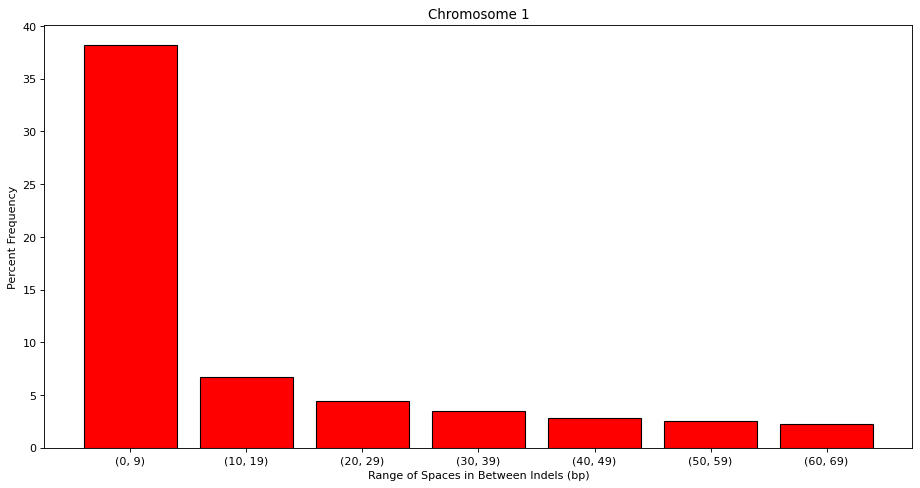

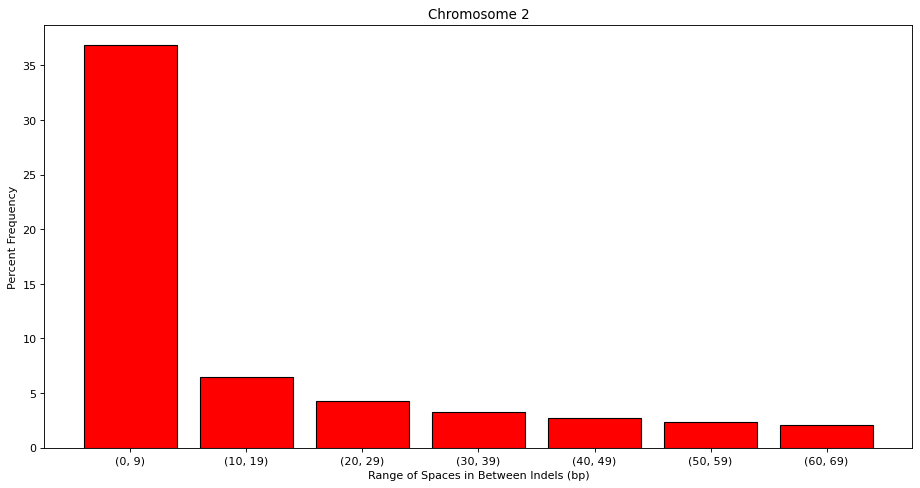

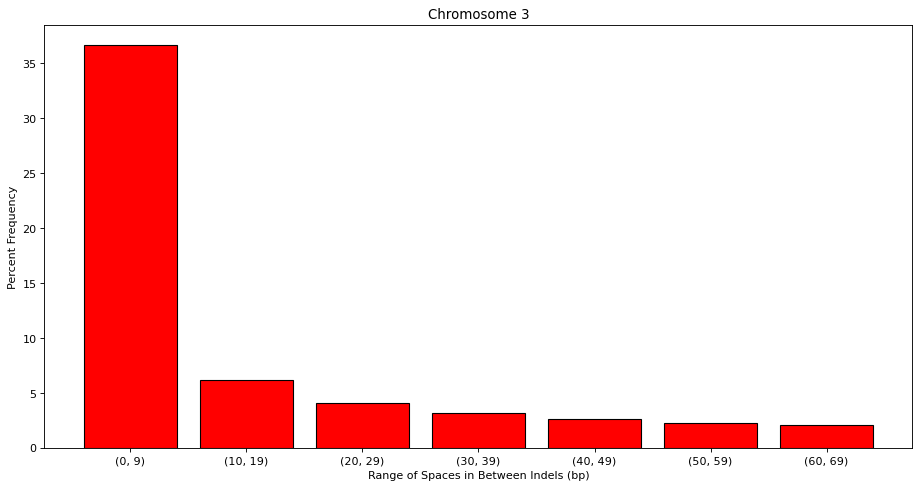

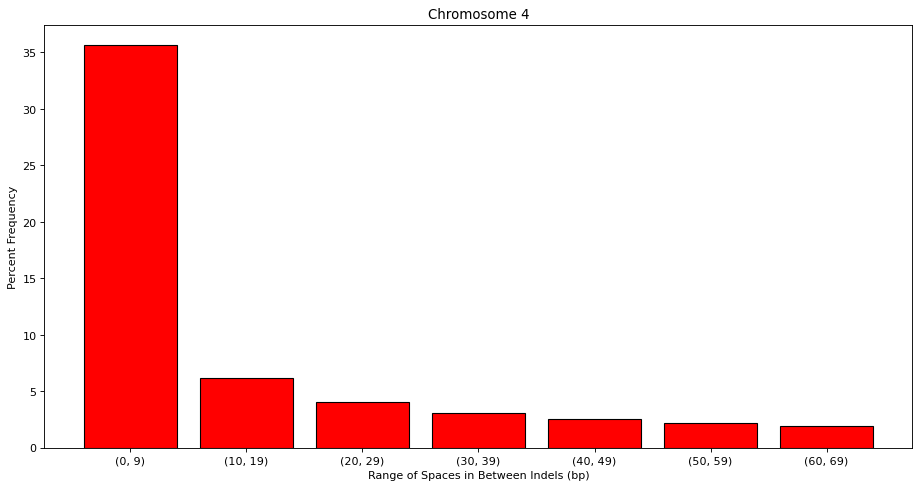

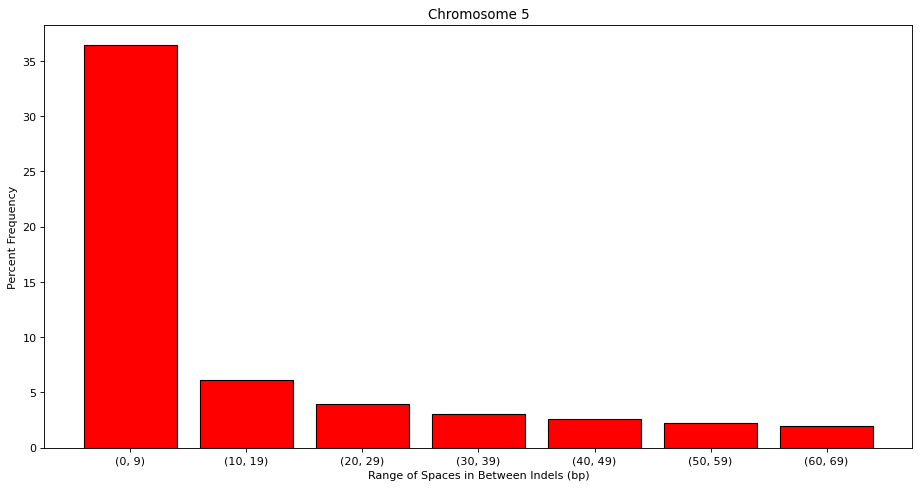

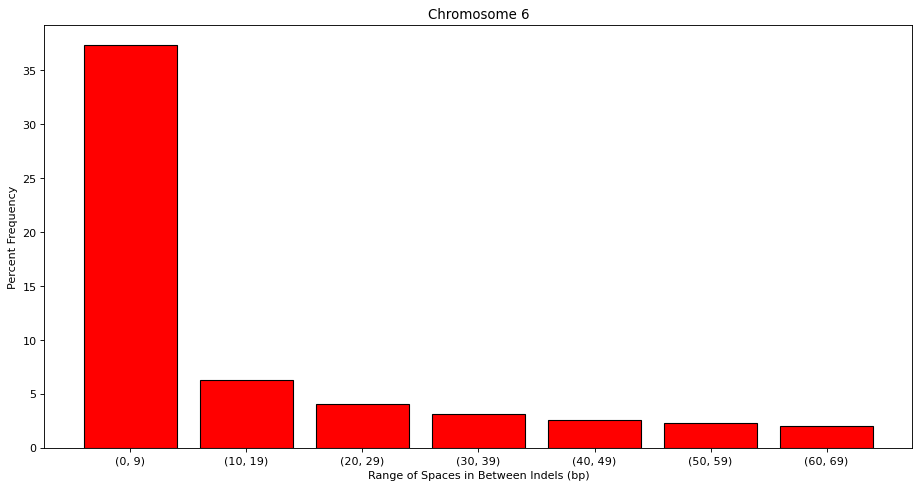

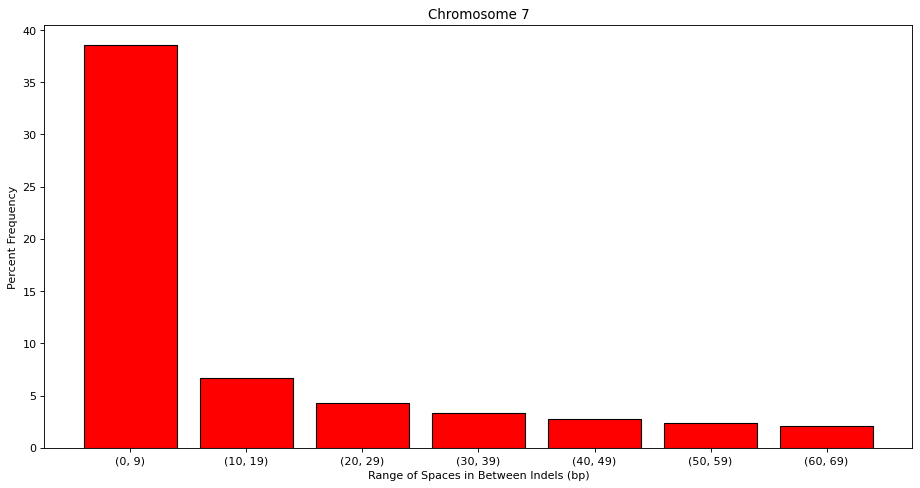

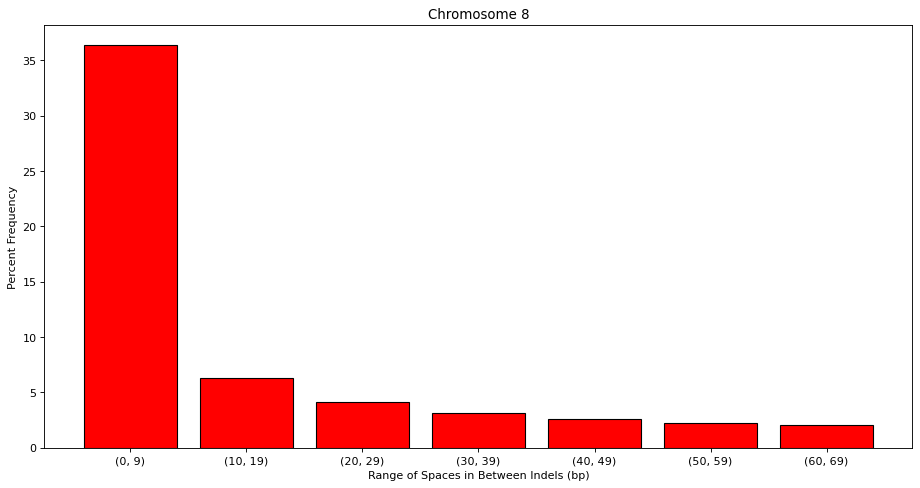

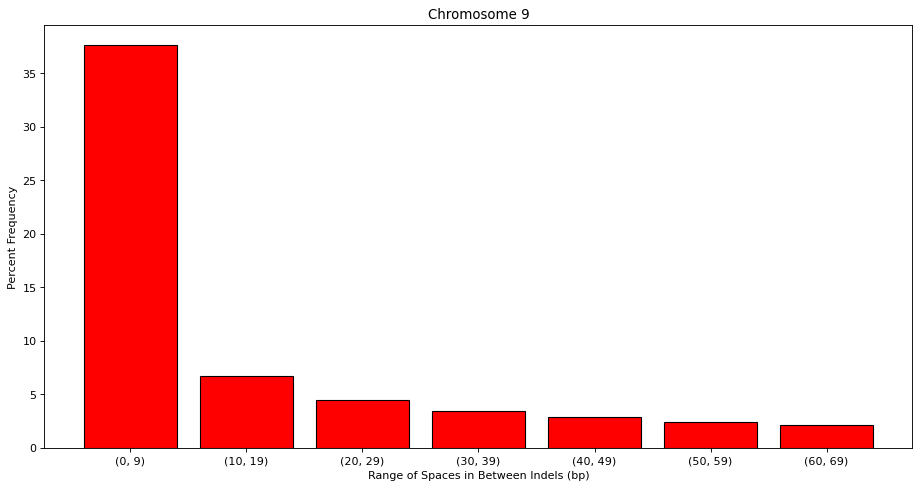

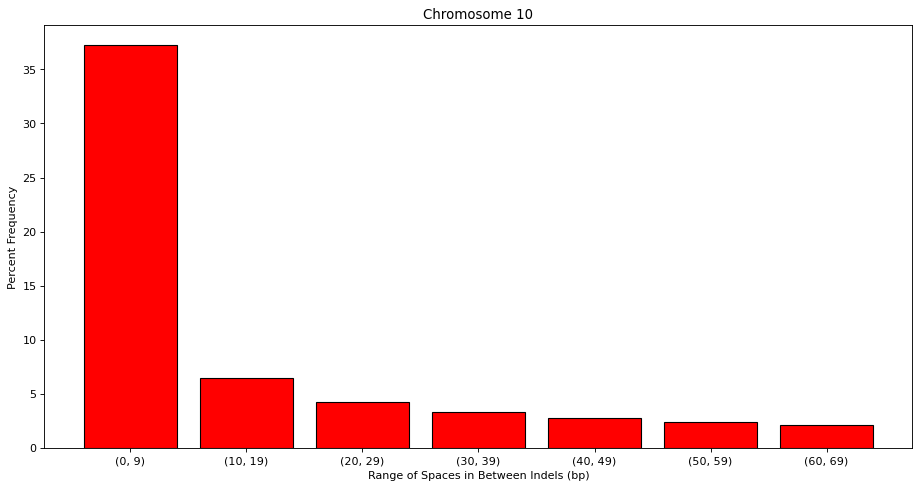

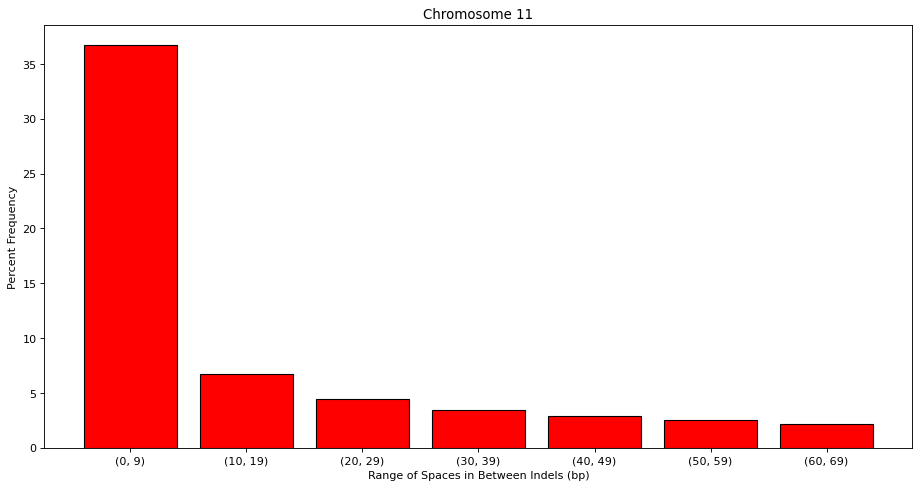

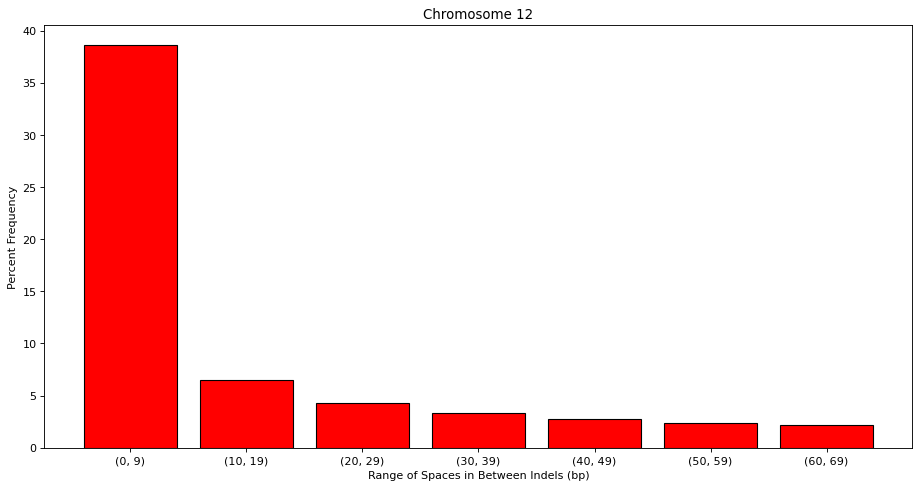

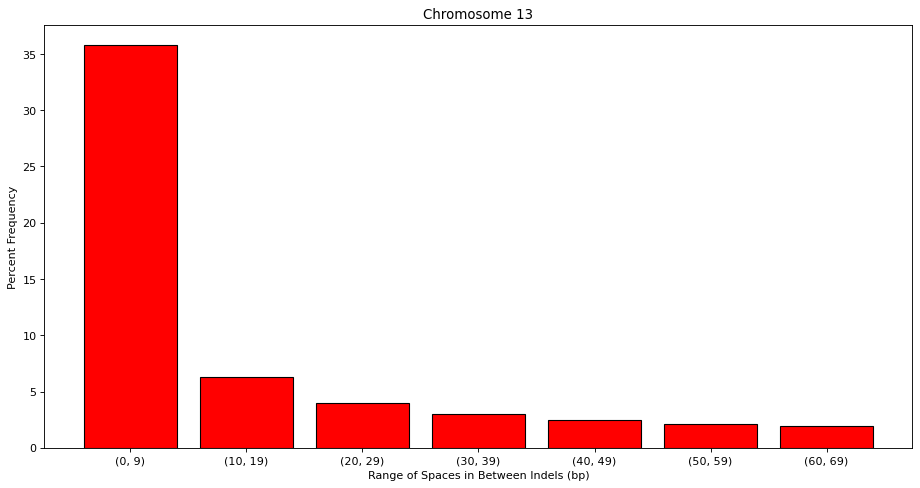

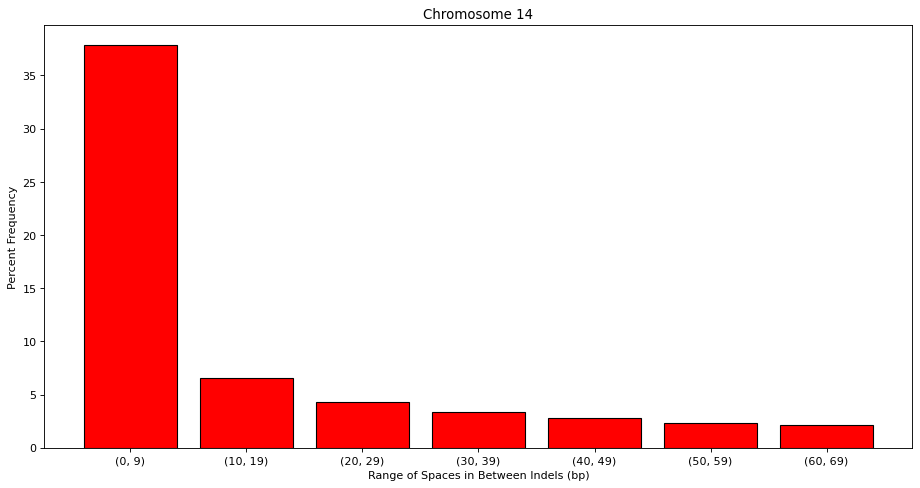

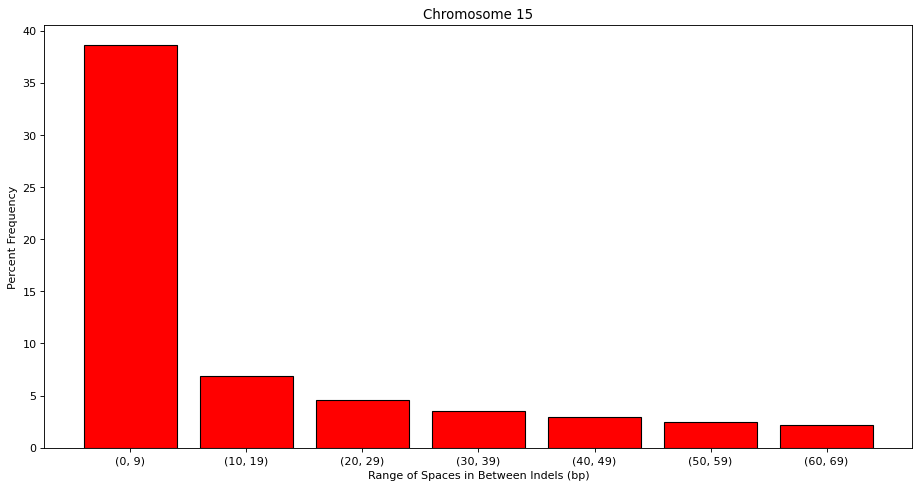

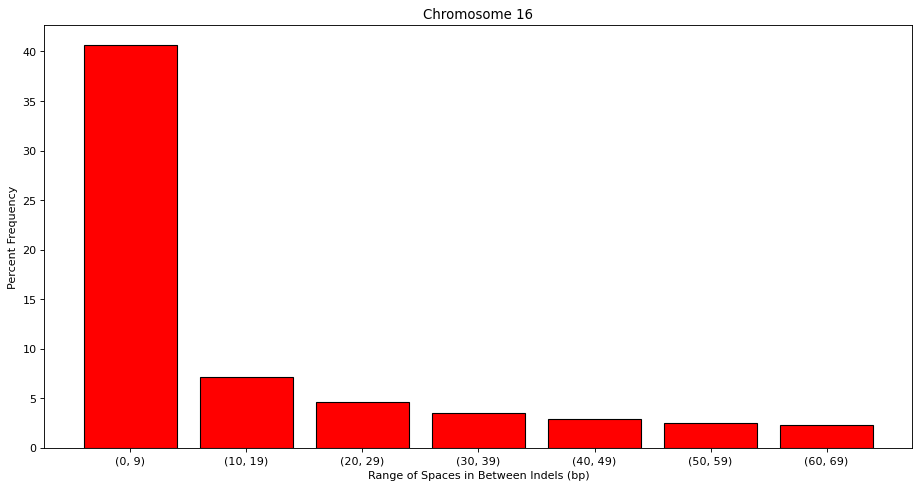

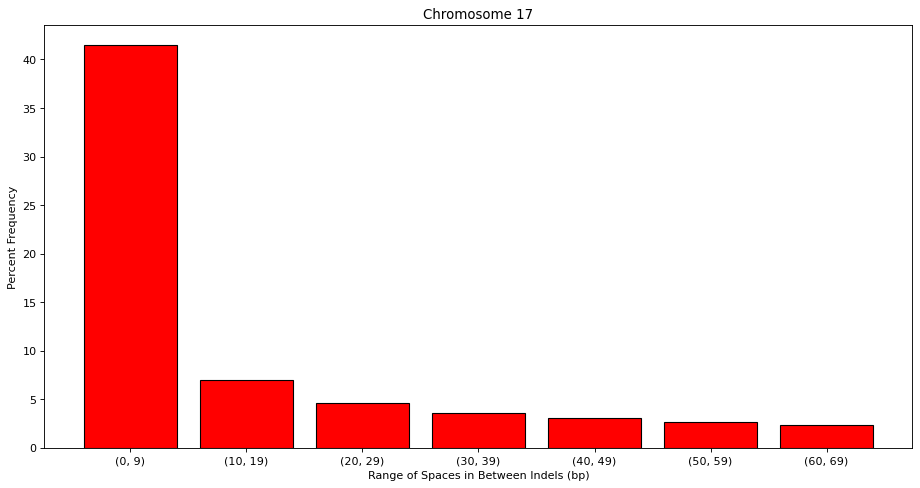

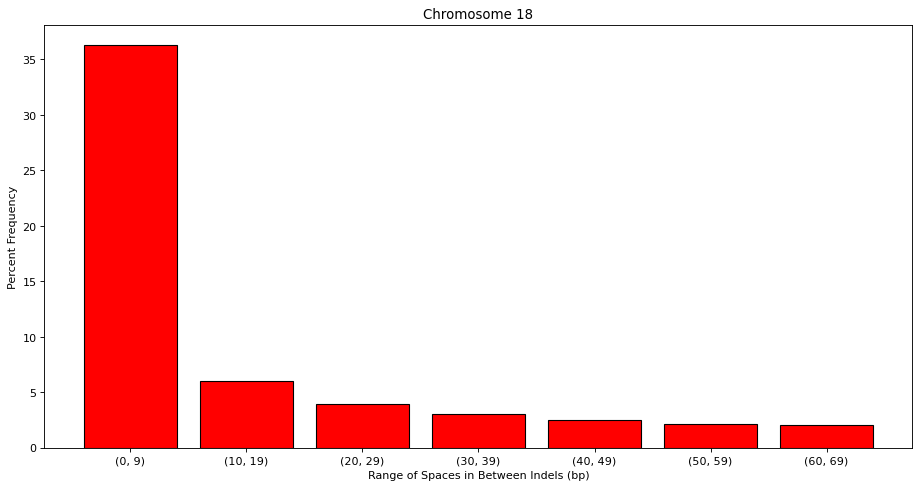

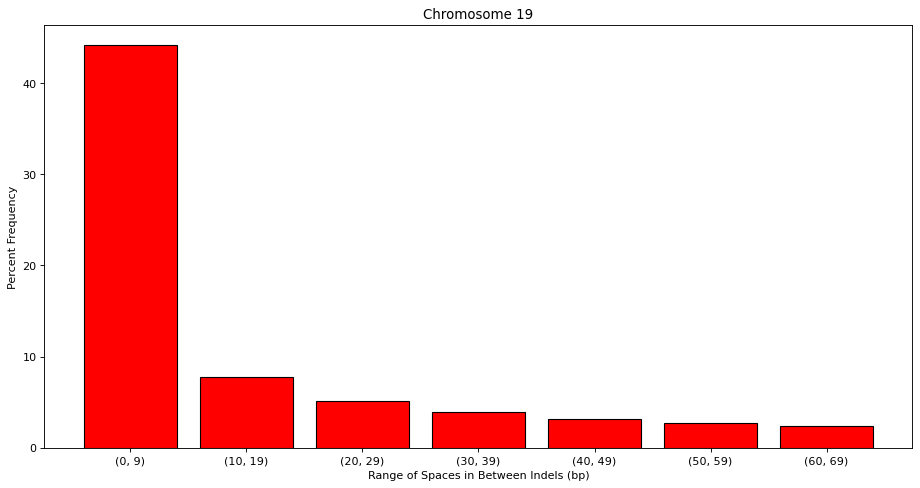

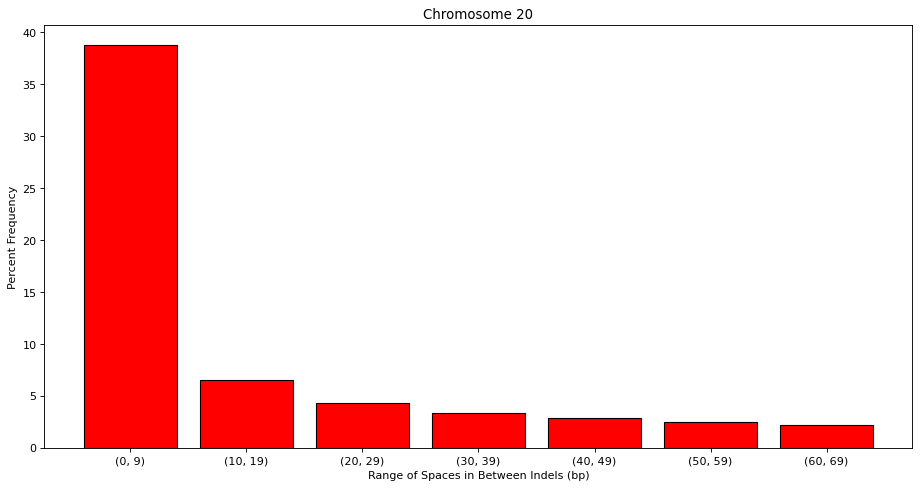

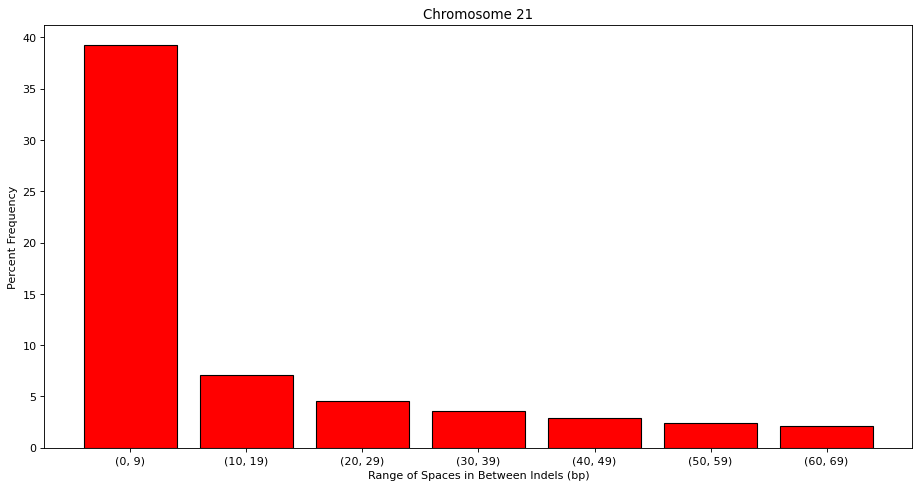

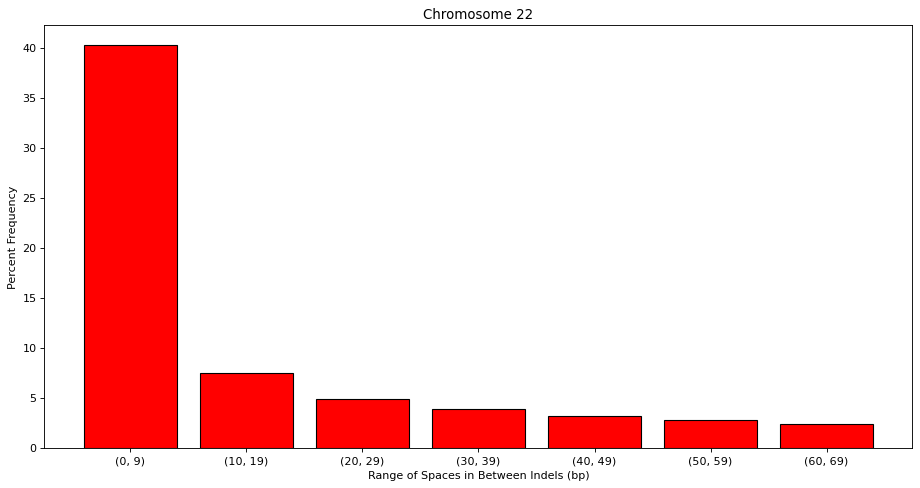

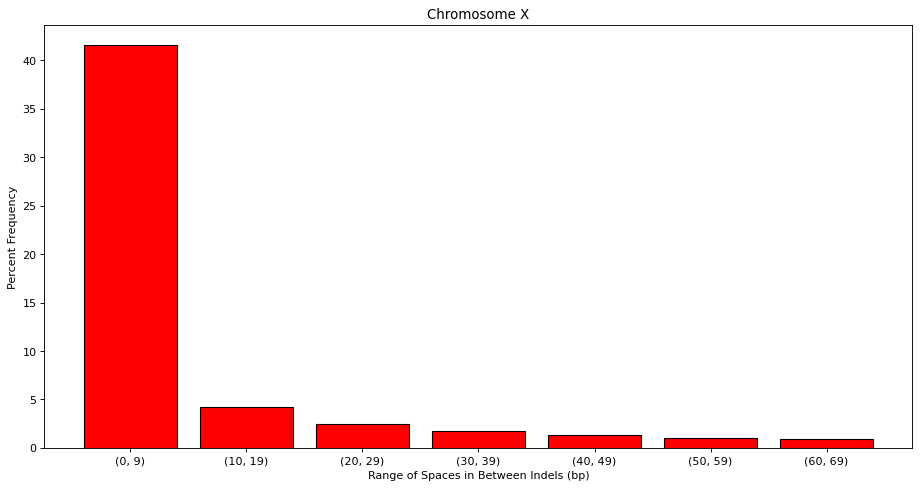

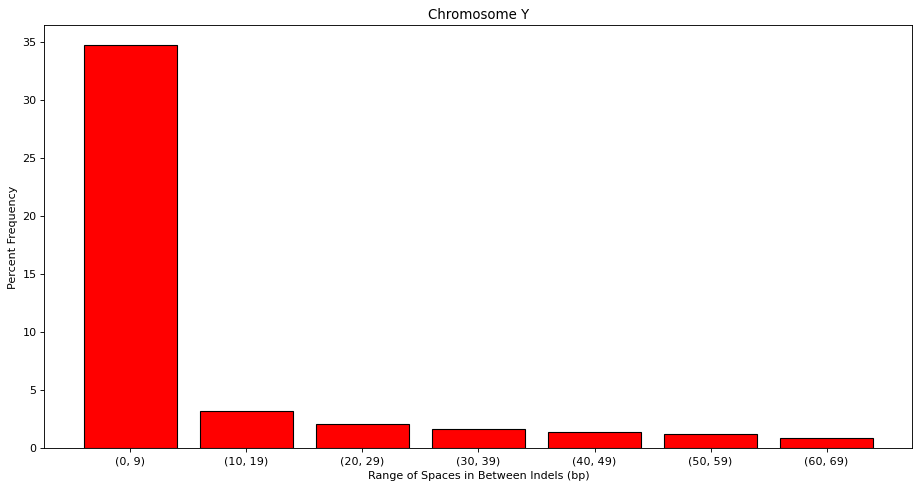

In [31]:
import matplotlib.pylab as plt
for i in range(0,len(Chromosomes)):
    vals = list(Range_Freq_Dist.values())
    n_items = take(7, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    x = [str(i) for i in x]
    plt.figure(figsize=(14, 7), dpi=80)
    plt.bar(x, y, color='red',edgecolor='black')
    plt.xticks(fontsize=10)
    plt.title('Chromosome %s'%(Chromosomes[i]))
    plt.xlabel('Range of Spaces in Between Indels (bp)')
    plt.ylabel('Percent Frequency')
    plt.savefig("Graphs/Chromosome{C}.png".format(C=Chromosomes[i]))


<ipython-input-693-bc3749461a33>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 7), dpi=80)


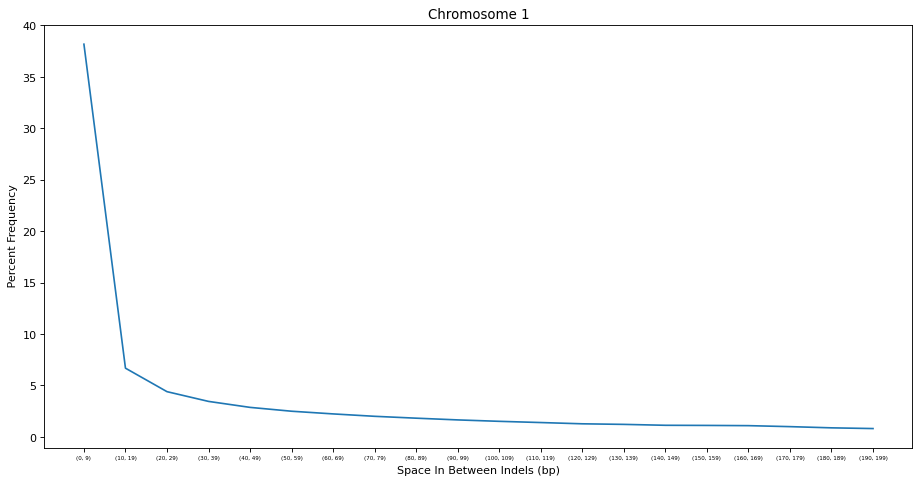

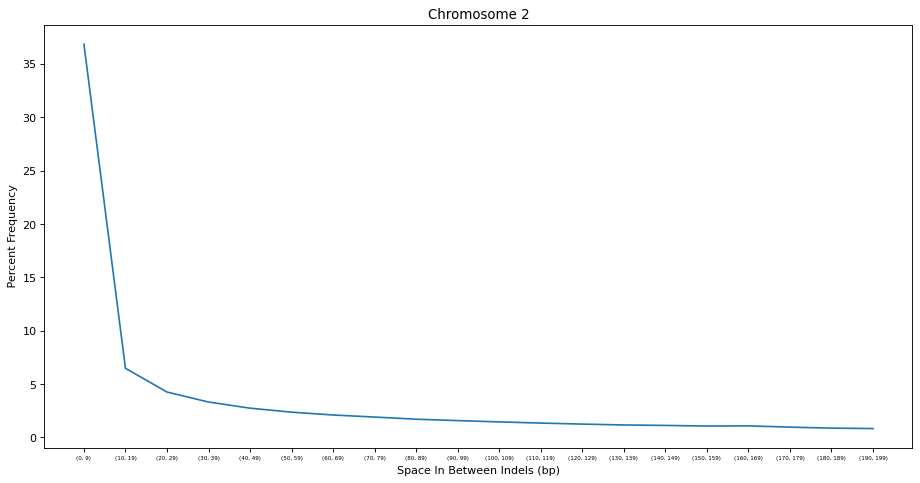

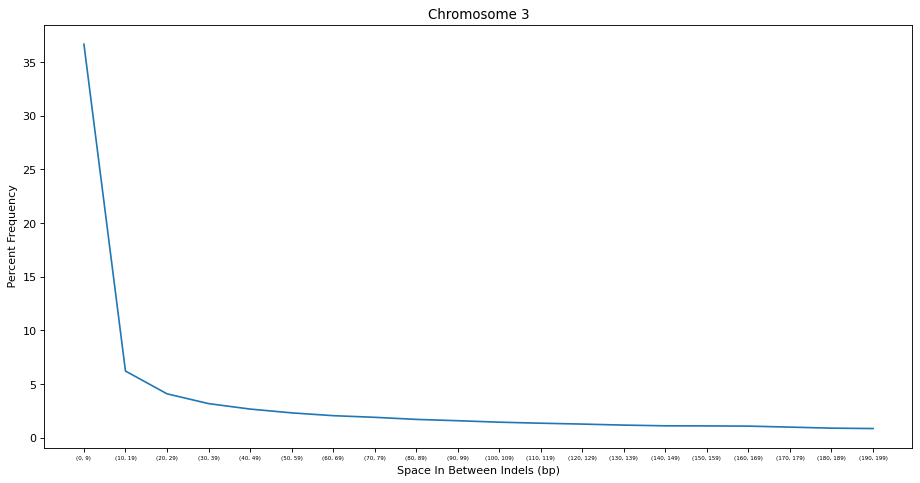

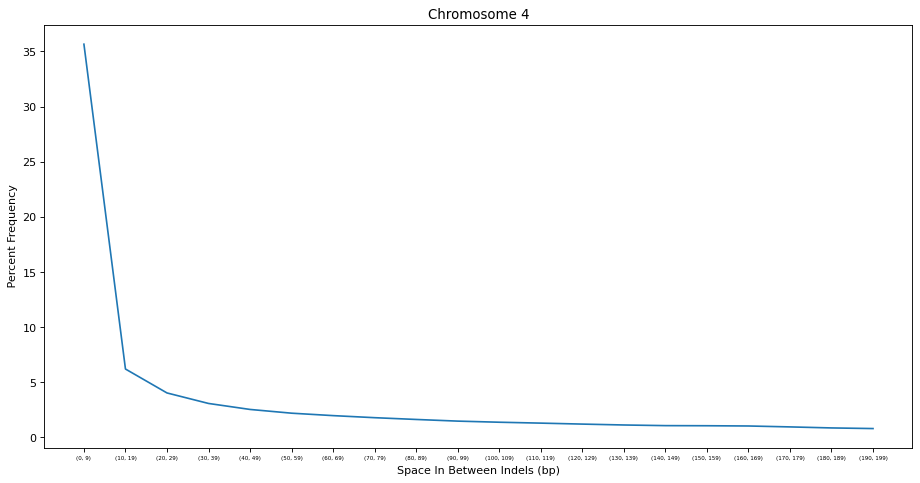

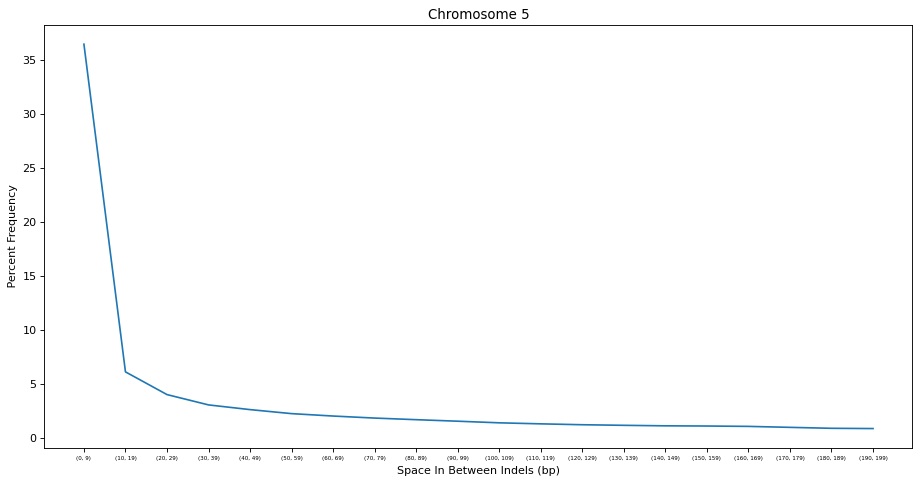

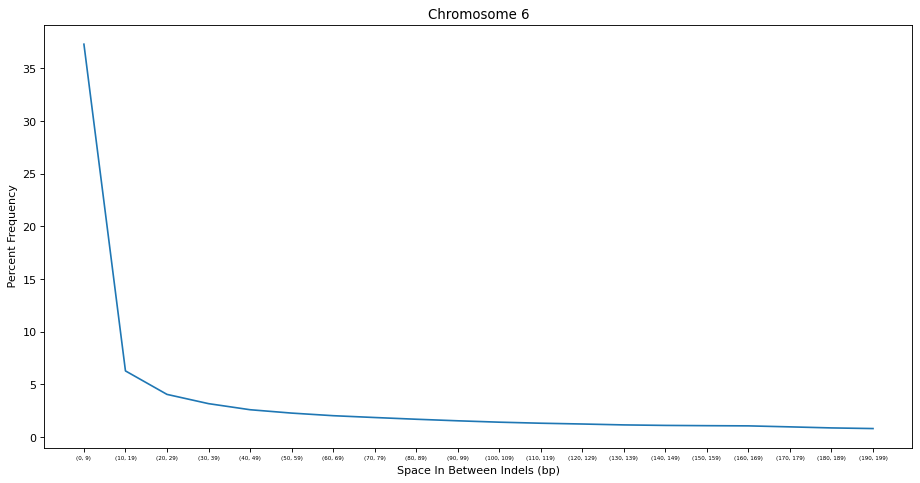

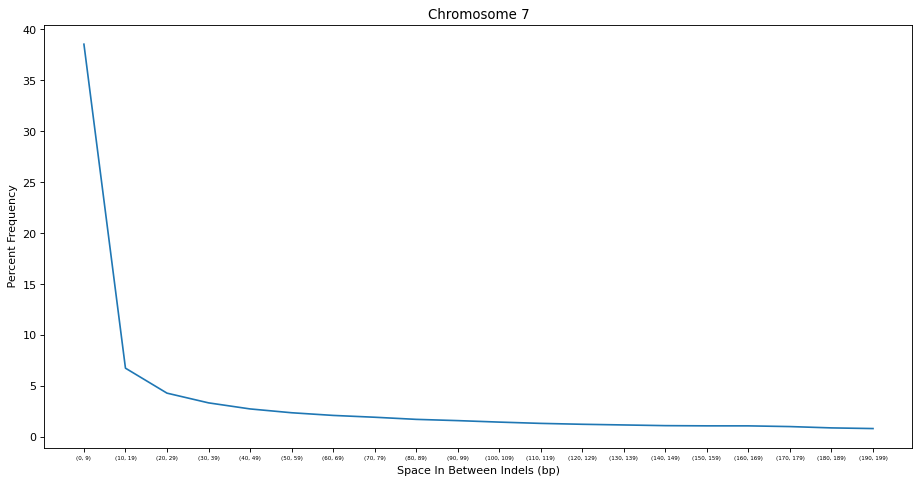

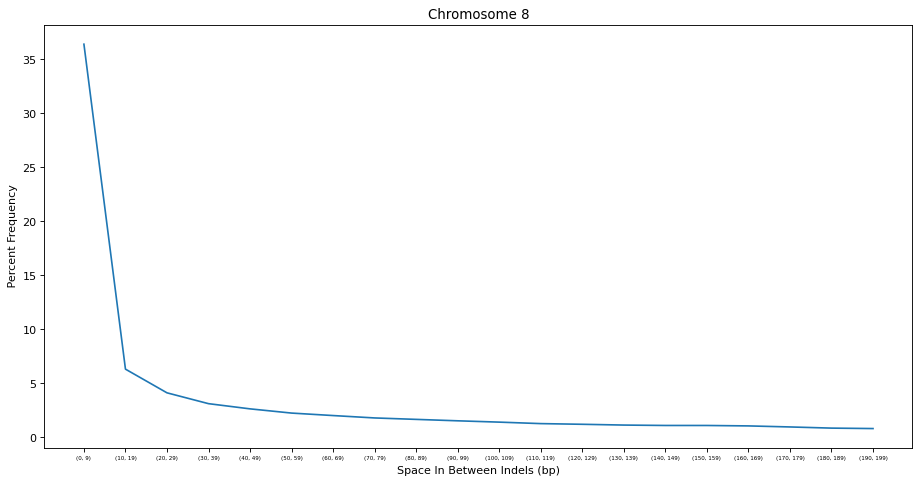

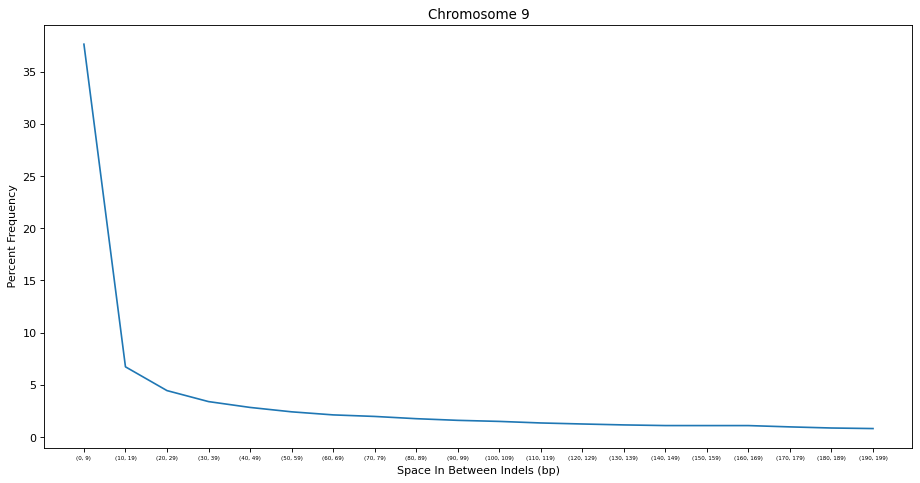

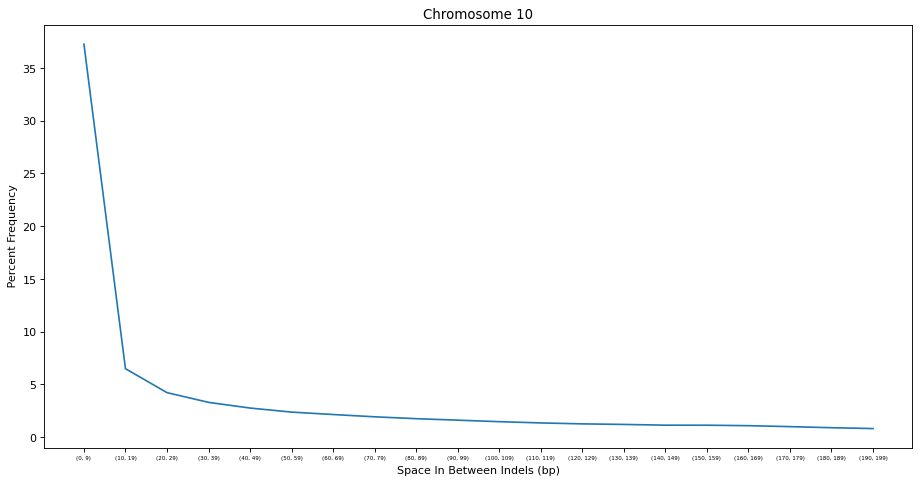

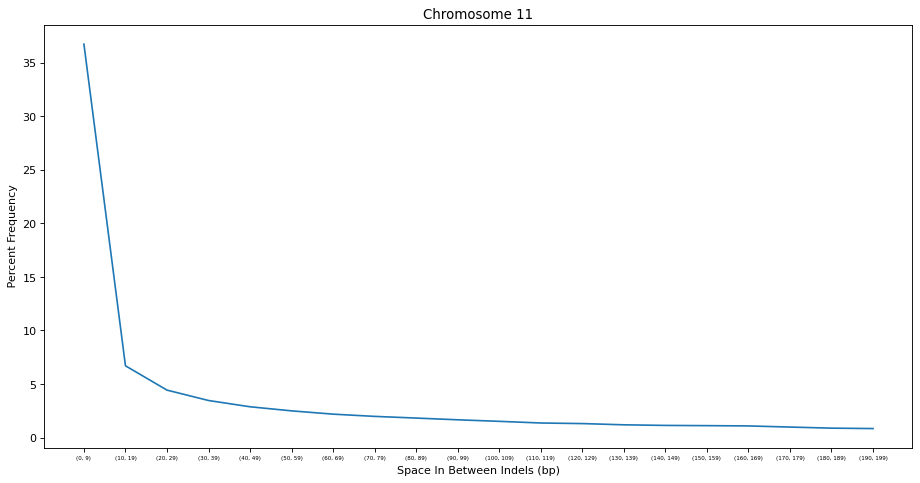

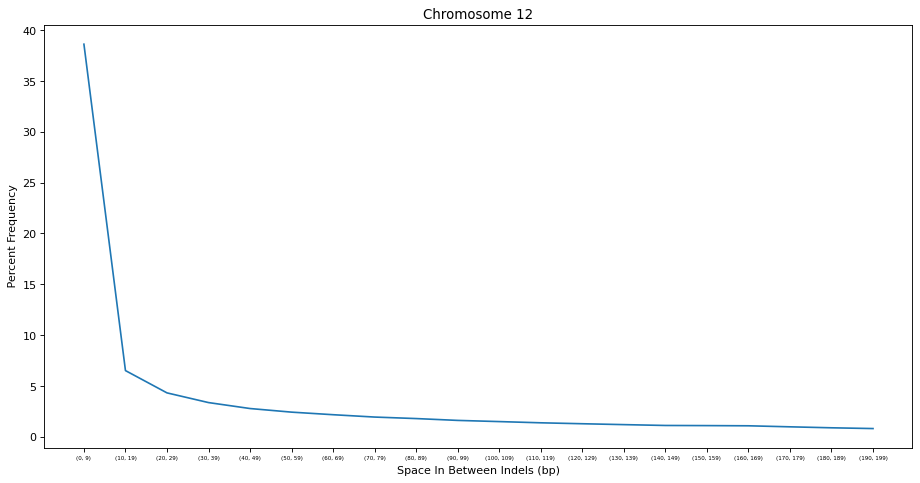

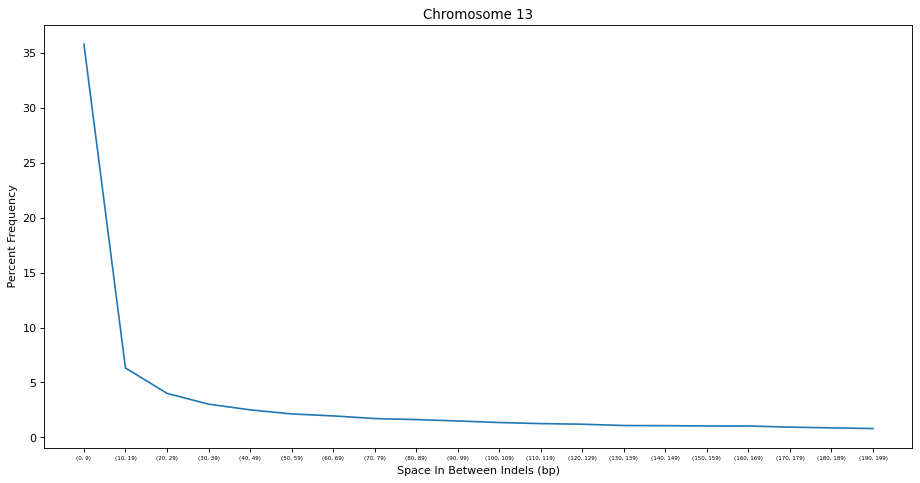

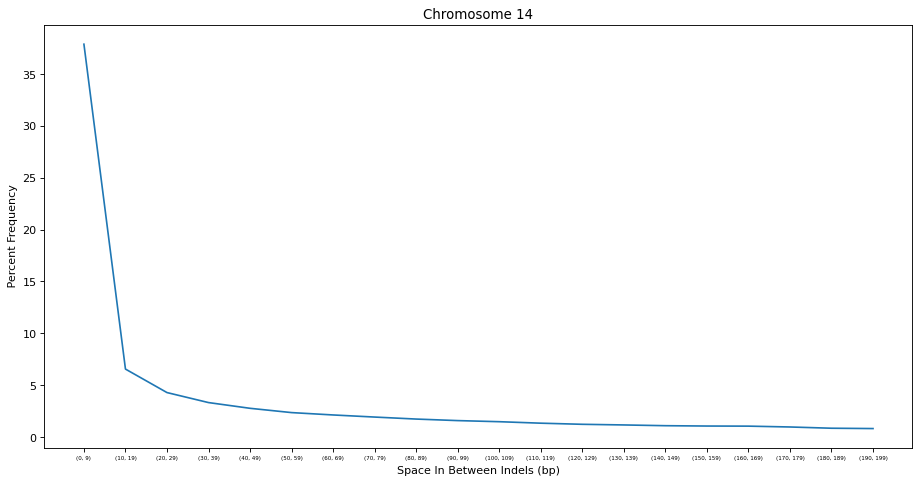

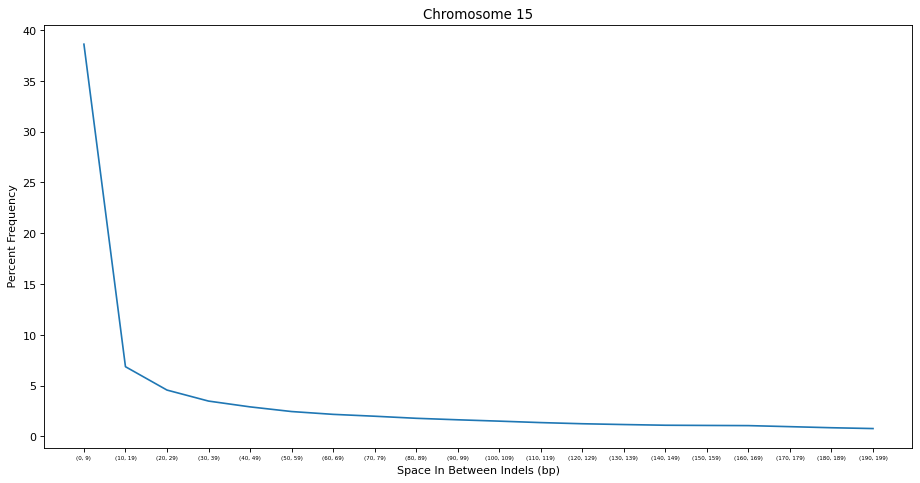

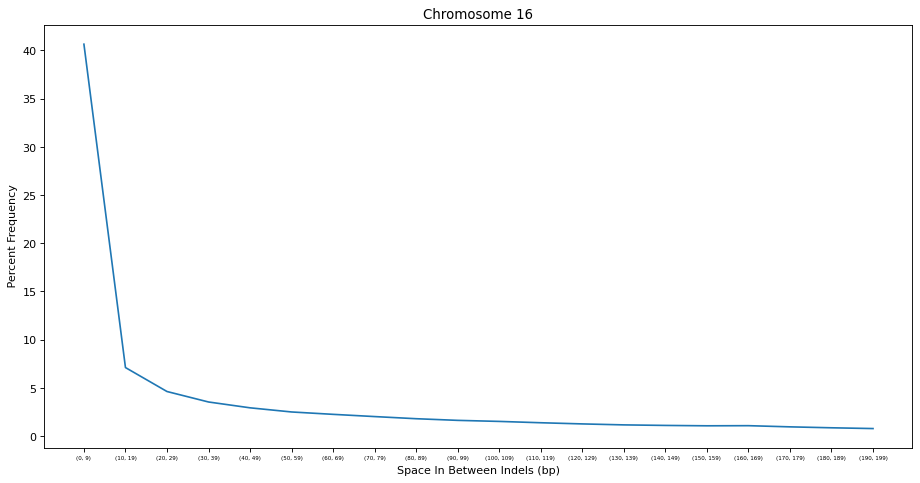

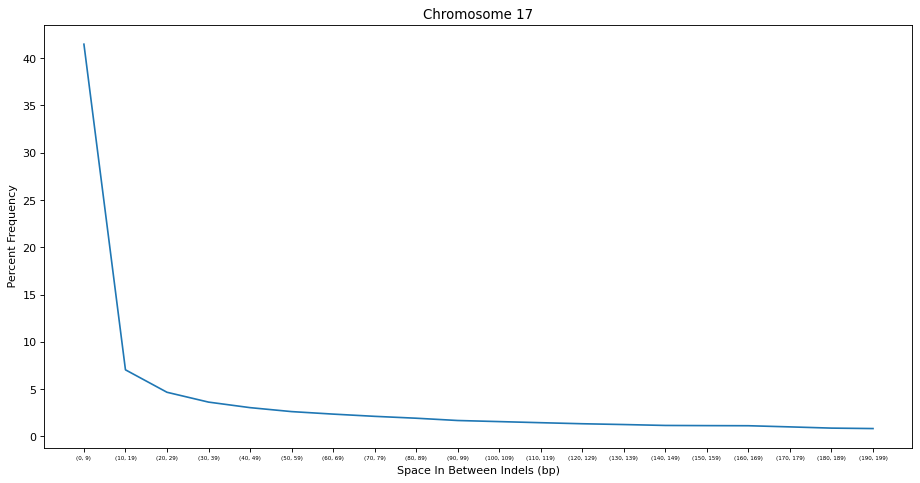

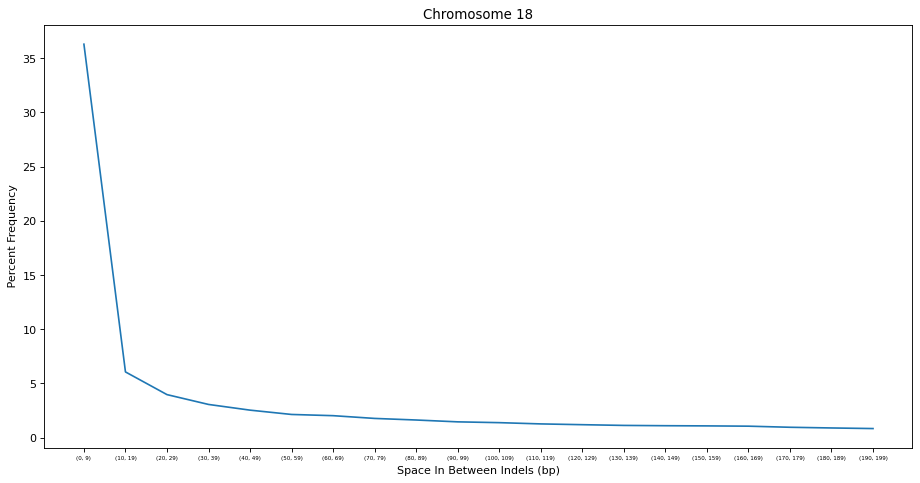

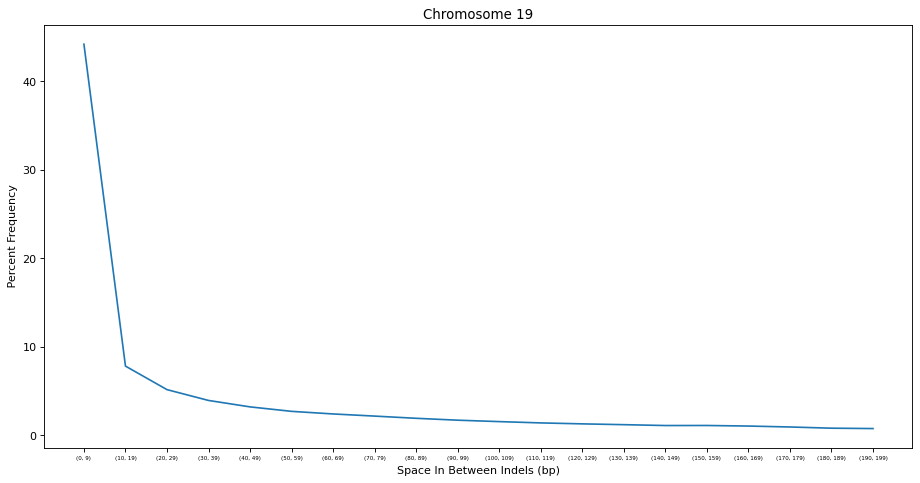

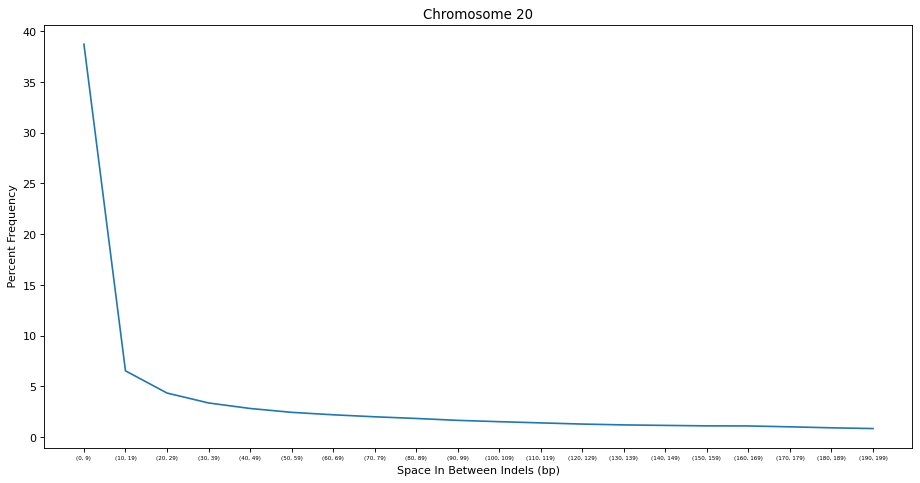

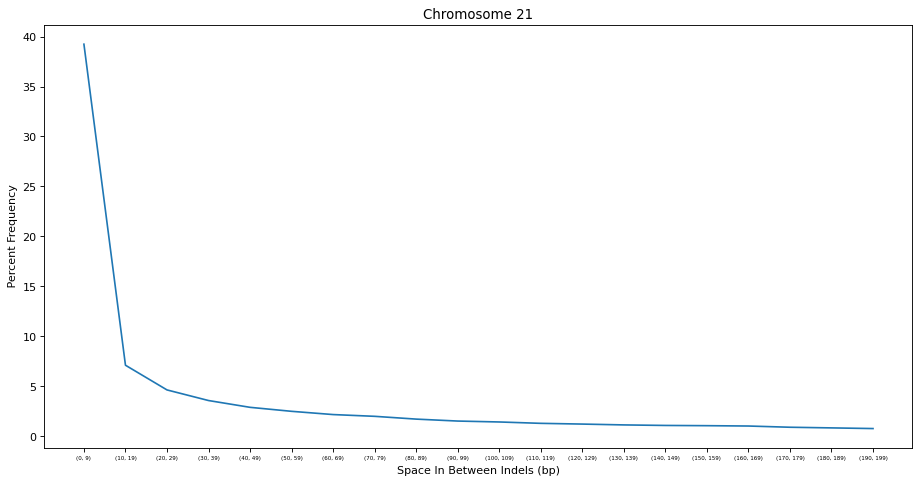

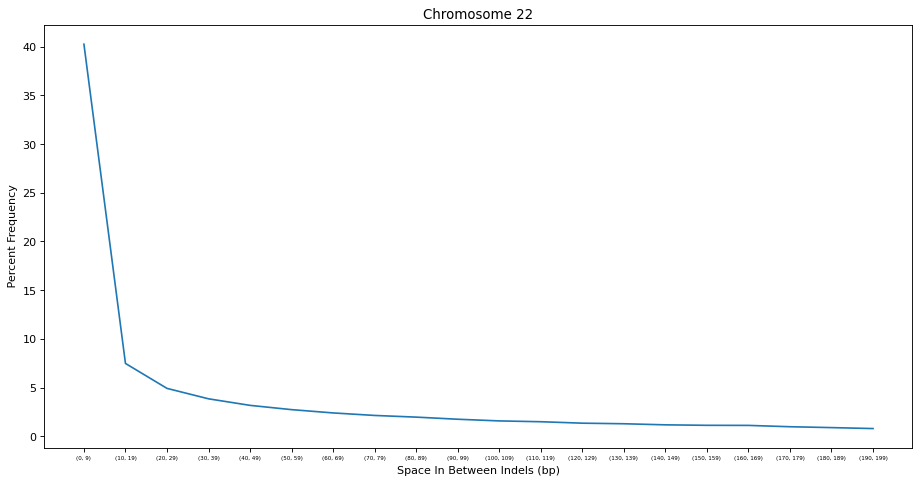

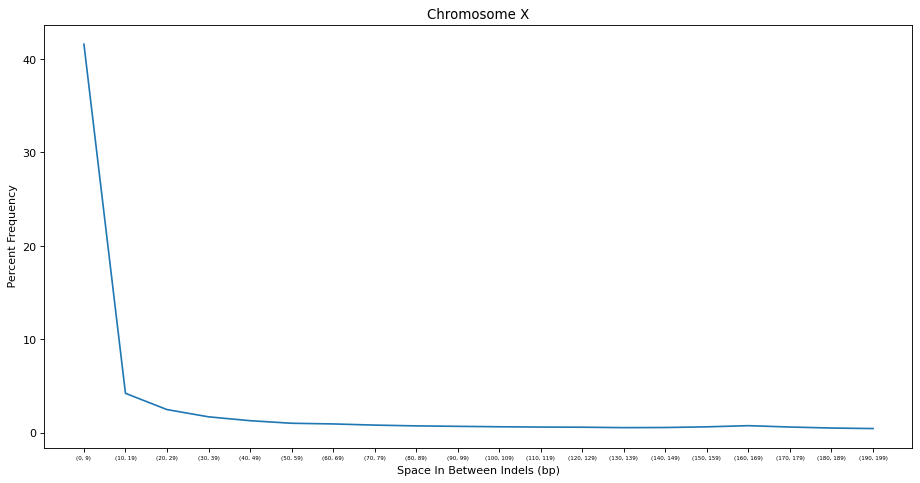

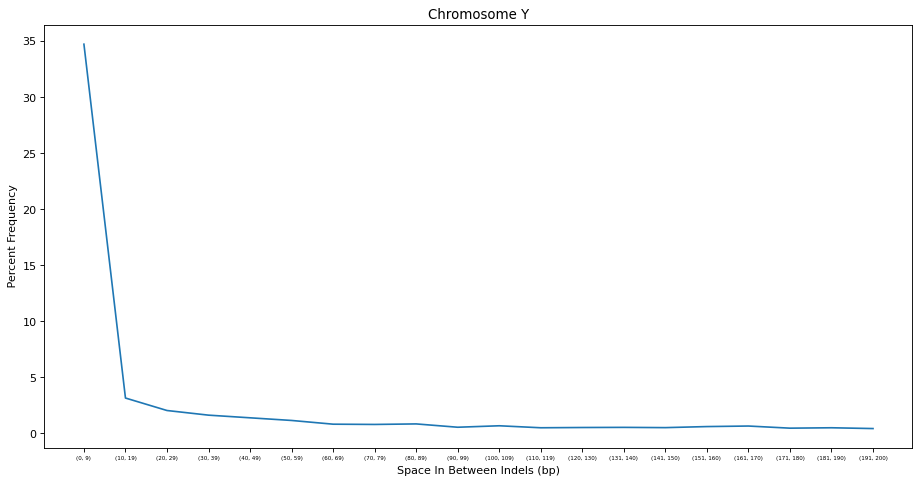

In [693]:
for i in range(0,len(Chromosomes)):
    vals = list(Range_Freq_Dist.values())
    n_items = take(20, vals[i].items())
    x, y = zip(*n_items) # unpack a list of pairs into two tuples
    x = [str(i) for i in x]
    
    plt.figure(figsize=(14, 7), dpi=80)
    plt.plot(x, y)
    plt.xticks(fontsize=5)
    plt.title('Chromosome %s'%(Chromosomes[i]))
    plt.xlabel('Space In Between Indels (bp)')
    plt.ylabel(' Percent Frequency')
    plt.savefig("Graphs/Chromosome{C}.png".format(C=Chromosomes[i]))
    plt.savefig("Line Graphs/Chromosome{C}.png".format(C=Chromosomes[i]))
